Module 1, Lesson 2

In [24]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
T = 100.0
dt = 0.02
N = int(T/dt) + 1
t = np.linspace(0.0,T,num=N)
print(t[-1])
t2 = np.arange(0,T+dt,dt)
print(t2[-1])

100.0
100.0


In [49]:
#Initial values, z0=altitude, b0=upward velocity from gust, zt = trim altitude
z0  = 100.0
b0 = 10.0
zt = 100.0
g = 9.81

#Initial value of solution
u = np.array([z0, b0])
#Elevation at each time step.
z = np.zeros(N)
z[0] = z0
print(u)

[100.  10.]


In [50]:
# Euler's method
for n in range(1,N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt*rhs
    z[n] = u[0]
    
# Exact Solution
b0 = 10.0
z0 = 100.0
z_exact = (b0*(zt/g)**0.5*np.sin((g/zt)**0.5*t) + 
          (z0 - zt)*np.cos((g/zt)**0.5*t) + zt)


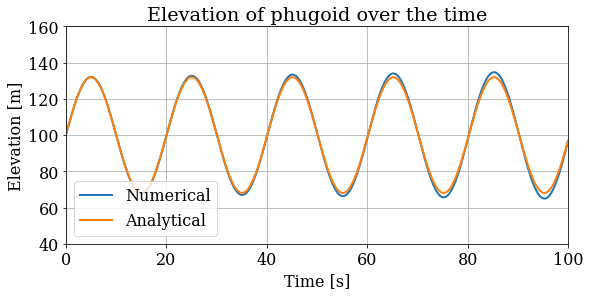

In [52]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=16

plt.figure(figsize=(9.0, 4.0))
plt.title('Elevation of phugoid over the time')
plt.xlabel('Time [s]')
plt.ylabel('Elevation [m]')
plt.xlim(t[0], t[-1])
plt.ylim(40.0, 160.0)
plt.grid()
plt.plot(t, z, label='Numerical',color='C0', linestyle='-', linewidth=2)
plt.plot(t, z_exact, label='Analytical', color='C1', linestyle='-',
         linewidth=2)
plt.legend()

Changing the initial condition, v, affects the plot by increasing the amplitude when v is increased.  When v=0, the plot is a straight line.

In [53]:
# Test for convergence
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_values = []

for dt in dt_values:
    N = int(T/dt) + 1
    t = np.linspace(0.0, T, num=N)
    u = np.array([z0,b0])
    z = np.empty_like(t)
    z[0] = z0
    for n in range(1,N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt*rhs
        z[n] = u[0]
    z_values.append(z)
    

In [54]:
def l1_error(z, z_exact, dt):
    """ Computes are returns the error between numerical and exact solutions
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats
    z_exact : numpy.ndarray
        The analytical solution as an array of floats
    dt : float
        The time-step size
    
    Returns
    -------
    error: float
        L1-norm of  the error with respect to the exact solution
    """
    error = dt*np.sum(np.abs(z - z_exact))
    return error

In [55]:
#Create and empty list to store the errors on each time grid.
error_values = []
for z, dt in zip(z_values, dt_values):
    N = int(T/dt) + 1
    t = np.linspace(0.0, T, num=N)
    # Compute exact solution again because linspace of t changes with each
    # iteration
    z_exact = (b0*(zt/g)**0.5*np.sin((g/zt)**0.5*t) + 
          (z0 - zt)*np.cos((g/zt)**0.5*t) + zt)
    error_values.append(l1_error(z, z_exact, dt))

(7.079457843841388e-05,
 0.14125375446227548,
 0.35190900765437,
 848.234980031681)

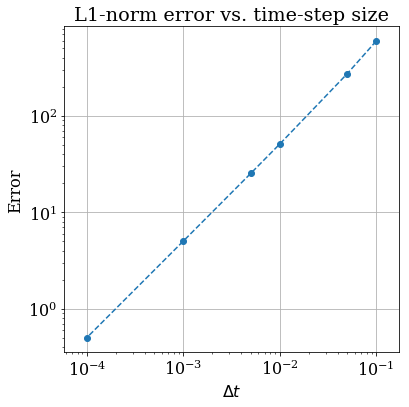

In [63]:
# plot error vs. time step
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm error vs. time-step size')
plt.xlabel('$\Delta t$')
plt.ylabel('Error')
plt.grid()
plt.loglog(dt_values, error_values, color = 'C0',
          linestyle = '--',  marker='o')
plt.axis('equal')

In [80]:
def euler(T, dt, z0, b0):
    ''' Function to calculate solution using euler's method
    
    Parameters
    ----------
    T : float, final time
    dt : float, time-step
    z0 : initial value, z
    b0 : initial  value, b 
    
    Returns:
    --------
    z : numpy.ndarray, z values at each time step.'''
    
    u = np.array([z0, b0])
    N = int(T/dt + 1)
    t = np.linspace(0.0,T,num=N)
    z = np.empty_like(t)
    z[0] = z0
    # Euler's method
    for n in range(1,N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt*rhs
        z[n] = u[0]
    return z

In [87]:
# Solution for different time-step sizes using function for euler's method
z0 = 100.0
b0 = 10.0
z2 = []
for i in range(len(dt_values)):
    z2.append(euler(T,dt_values[i], z0, b0))

# Array z2, has all values of z at different time steps, 
for i in range(len(z2)):
    print(len(z2[i]))

1001
2001
10001
20001
100001
1000001
